In [2]:
#identity matrix

import numpy as np
def warmUpExercise():
    A = []
    A = np.eye(5)
    return A

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [3]:
#linear regression to predict profit for food truck

#read the comma seperated files
#load the text file
import os
data = np.loadtxt(os.path.join("C:/Users/dynam/Desktop/Coursera AndrewNg/machine-learning-ex1/machine-learning-ex1/ex1/" , "ex1data1.txt"),delimiter=',')
X,y = data[:,0],data[:,1] #0th column as training and 1st column as label
m = y.size #number of training examples

In [5]:
#visualizing data before doig any work on it
from matplotlib import pyplot as plt
def plotData(X,y):
    plt.plot(X,y,"r.",ms = 5, mec = 'k') #ms means marker size and mec means marker edge color
    plt.xlabel("Population of city in 10,000s")
    plt.ylabel("profit in $10,000")
    fig = plt.figure()

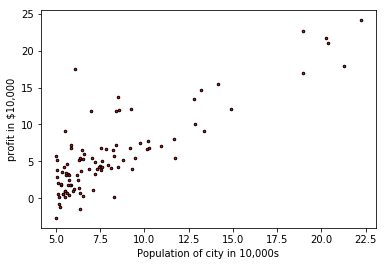

<Figure size 432x288 with 0 Axes>

In [6]:
plotData(X,y)

In [7]:
#fitting the linear regression parameters "theta" to our data st using gradient descent

#adding a colmn of ones denoting the "Xo" column to accomodate "thetao"
#np.stack is used to join two arrays along a gives axis
X = np.stack([np.ones(m),X],axis = 1)

In [70]:
#computing the cost J(theta) of using theta as parameter for linear regression.This should be minimiszed by gradient descent to find parameters "theta"

#X,y,theta are matrices
#shape of X : m,(n+1)
#shape of y : m,
#shape of theta : (n+1),1
def computeCost(X,y,theta):
    m = y.size #number of training examples
    J = 0
    hThetaOfX = np.dot(X,theta)
    J = (1/2*m)*(np.sum(np.square(hThetaOfX - y)))
    return J

In [80]:
print("with theta = [0,0], the cost computed is {}".format(computeCost(X,y,np.zeros(2))))

with theta = [0,0], the cost computed is 32.072733877455676


In [81]:
print("with theta = [-1,2],the cost computed is {}".format(computeCost(X,y,np.array([-1,2]))))

with theta = [-1,2],the cost computed is 54.24245508201238


In [84]:
#Note of numpy:
z = np.array([1,2,3])
print(np.dot(z,z))
z = z[None,:]
print(z)

14
[[1 2 3]]


In [99]:
def gradientDescent(X,y,theta,alpha,num_iter):
    m = y.shape[0]
    theta = theta.copy() #make a copy so that original values arent changed
    J_history = [] #make a list to store the history of J after every iteration
    for i in range(num_iter):
        dJtheta = np.dot((alpha/(m))*(np.dot(X,theta) - y),X)
        theta = theta - dJtheta
        J_history.append(computeCost(X,y,theta))
    return J_history,theta   

In [100]:
theta = np.zeros(2)
num_iter = 1500
alpha = 0.01
J_history,theta = gradientDescent(X,y,theta,alpha = 0.01,num_iter = 1500)
print("theta found by gradient descent is {}".format(theta))
print("Expected theta values (approximately): [-3.6303, 1.1664]")

theta found by gradient descent is [-3.63029144  1.16636235]
Expected theta values (approximately): [-3.6303, 1.1664]


Text(0, 0.5, 'J(theta)')

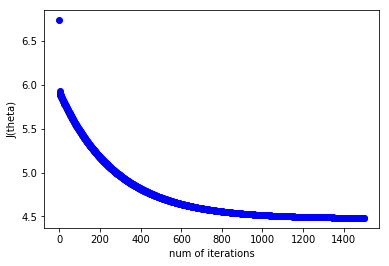

In [101]:
#after calculating the value of theta using gradient descent,let us see how J(theta) faired over iterations
x = [x for x in range(1500)]
y = J_history
plt.plot(x,y,"bo")
plt.xlabel("num of iterations")
plt.ylabel("J(theta)")

Text(0, 0.5, 'profit')

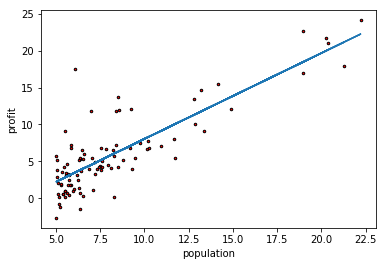

In [110]:
#now lets fit a straight line to the data
hypothesis = np.dot(X,theta)
plt.plot(X[:,1],data[:,1],"r.",ms = 5, mec = 'k')
plt.plot(X[:,1],hypothesis)
plt.xlabel("population")
plt.ylabel("profit")

In [116]:
#now us ethe hypotheis to predict the profit fot areas with population 35,000 and 70,000
def predict(new_population,theta):
    new_X = [1,new_population/10000]
    #print(new_X)
    res = np.dot(new_X,theta)
    return res*10000
print("the new profit when the population is 35 thousand is is {:.2f}".format(predict(35000,theta)))

the new profit when the population is 35 thousand is is 4519.77


In [117]:
print("the new profit when the population is 70 thousand is is {:.2f}".format(predict(70000,theta)))

the new profit when the population is 70 thousand is is 45342.45


Steps for Solving:

1)Make Matrix X,vector y

2)Then take initial values of theta

3)Then compute J(theta) ie cost for it

4)Then using gradient descent find the vale of theta for which the cost is minimum

5)Use this to predict new data

In [72]:
#linear regression with multiple variables

#loading the data
data_ex2 = np.loadtxt(os.path.join("C:/Users/dynam/Desktop/Coursera AndrewNg/machine-learning-ex1/machine-learning-ex1/ex1","ex1data2.txt"),delimiter=',')
X = data_ex2[:,0:2]
x1 = X[:,1]
x2 = X[:,-1]
y = data_ex2[:,2]

#printout 10 examples from the data set
print("SL.NO     X[:,0]       " + "X[:,1]       " + "y")
print("SL.NO     House Size       " + "#Bedrooms       " + "Price")
print("-----------------------------------------")
for i in range(10):
    print("{}     {}     |    {}   |    {}".format(i,X[i,0],X[i,1],y[i]))

47 2
SL.NO     X[:,0]       X[:,1]       y
SL.NO     House Size       #Bedrooms       Price
-----------------------------------------
0     2104.0     |    3.0   |    399900.0
1     1600.0     |    3.0   |    329900.0
2     2400.0     |    3.0   |    369000.0
3     1416.0     |    2.0   |    232000.0
4     3000.0     |    4.0   |    539900.0
5     1985.0     |    4.0   |    299900.0
6     1534.0     |    3.0   |    314900.0
7     1427.0     |    3.0   |    198999.0
8     1380.0     |    3.0   |    212000.0
9     1494.0     |    3.0   |    242500.0


In [71]:
#house size is about 1000 times #Bedrooms,
#hence as the features differ by the orders of magnitude 10^3
#we should perform feature scaling before adding the Xo = 1 for all the rows

#this is my implementation,somethings wrong,check it later
'''def featureNormalize(X):
    x1 = X[:,1]
    x2 = X[:,-1] 
    x1_norm = x1.copy()
    x2_norm = x2.copy()
    x1_mean = np.mean(x1,axis = 0)
    x2_mean = np.mean(x2,axis=0)
    x1_std = np.std(x1,axis = 0)
    x2_std = np.std(x2,axis = 0)
    x1 -= x1_mean
    x1 /= x1_std
    x2 -= x2_mean
    x2 /= x2_std
    X_norm = np.vstack((x1,x2))
    #mu = (x1_mean + x2_mean)/2
    #sigma = (x1_std + x2_std)/2
    return X_norm,[x1_mean,x2_mean],[x1_std,x2_std]'''

def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1]) #one index for x1_mean and other index for x2_mean
    sigma = np.zeros(X.shape[1])
    
    mu = np.mean(X,axis = 0) #axis = 0 means column wise
    sigma = np.std(X,axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm,mu,sigma

In [68]:
X_norm,mu,sigma = featureNormalize(X)
print("The computed mean is ",mu)
print("The computed standard deviation is ",sigma)

The computed mean is  [2000.68085106    3.17021277]
The computed standard deviation is  [7.86202619e+02 7.52842809e-01]


In [76]:
#add the Xo term after normalization
#m = #rows = #training examples
#concatenate ones array to normalized X along every row

rows,columns = X_norm.shape
X = np.concatenate([np.ones((rows,1)),X_norm],axis = 1) #axis = 1 : adding row wise

[[ 1.00000000e+00  1.31415422e-01 -2.26093368e-01]
 [ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1.00000000e+00  5.07908699e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.43677059e-01 -1.55439190e+00]
 [ 1.00000000e+00  1.27107075e+00  1.10220517e+00]
 [ 1.00000000e+00 -1.99450507e-02  1.10220517e+00]
 [ 1.00000000e+00 -5.93588523e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.29685755e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.89466782e-01 -2.26093368e-01]
 [ 1.00000000e+00 -6.44465993e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.71822042e-02  1.10220517e+00]
 [ 1.00000000e+00 -8.65999486e-04 -2.26093368e-01]
 [ 1.00000000e+00 -1.40779041e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.15099326e+00  2.43050370e+00]
 [ 1.00000000e+00 -9.31923697e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.80715024e-01  1.10220517e+00]
 [ 1.00000000e+00 -8.65782986e-01 -1.55439190e+00]
 [ 1.00000000e+00 -9.72625673e-01 -2.26093368e-01]
 [ 1.00000000e+00  7.73743478e-01  1.10220517e+00]
 [ 1.00000000e+00  1.31050078e+

In [89]:
#compute the cost for linear regression with multiple variables while using theta as parameter 
#here X is the design matrix ie consisting of all the feature matrices

def computeCostMulti(X,y,theta):
    m = y.shape[0]
    J = 0
    J = (1/(2*m))*np.sum(np.square(np.dot(X,theta) - y))
    return J

In [90]:
#compute gradient descent to learn theta

def gradientDescentMulti(X,y,theta,alpha,num_iter):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iter):
        theta = theta - (alpha/m)*(np.dot(X,theta) - y).dot(X)
        J_history.append(computeCostMulti(X,y,theta))
    return theta,J_history

the alpha choosen is 0.1


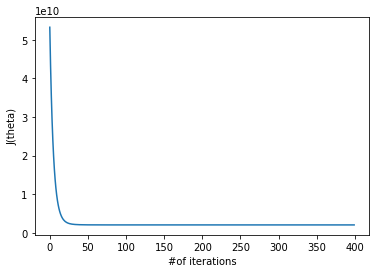

theta computed by gradient descent is [340412.65957447 109447.79558639  -6578.3539709 ]
1
the alpha choosen is 0.3


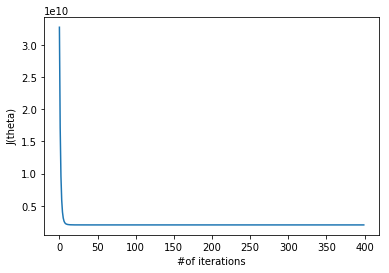

theta computed by gradient descent is [340412.65957447 109447.79646964  -6578.35485416]
2
the alpha choosen is 0.03


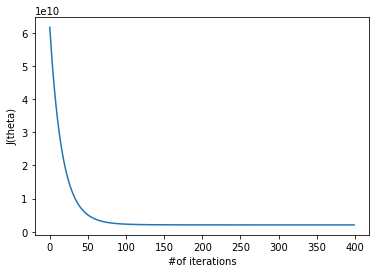

theta computed by gradient descent is [340410.91897274 109162.68848142  -6293.24735132]
3
the alpha choosen is 0.01


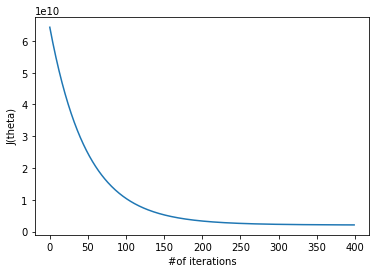

theta computed by gradient descent is [334302.06399328  99411.44947359   3267.01285407]
4


In [104]:
#try out different learning rates for the data set to find a learning rate that converges quickly
#run gradient descent for the chosen learning rate for about 50 iterations returnng the value of J
#choose the plot with decreasing cost over number of iterations
#trying out learning rates alpha as 0.3,0.1,0.03,0.01

import matplotlib.pyplot as plt
alpha_list = np.array([0.1,0.3,0.03,0.01])
num_iters = 400
theta = np.zeros(3) #3 features including Xo
theta_vals = []
for i in range(alpha_list.shape[0]):
    print("the alpha choosen is {}".format(alpha_list[i]))
    new_theta,J_history = gradientDescentMulti(X,y,theta,alpha_list[i],num_iters)
    plt.plot([x for x in range(num_iters)],J_history)
    plt.xlabel("#of iterations")
    plt.ylabel("J(theta)")
    plt.show()
    print("theta computed by gradient descent is {}".format(new_theta))
    theta_vals.append(new_theta)
    print(len(theta_vals))

In [152]:
#now we have to make prediction as we have found out the optimal alpha and theta
#Estimate the price of a 1650 sq-ft,3 Bedroom house

X_vect = np.array([1,1650,3],dtype = "f")
#normalize the features except for Xo using mean and std obtained for training set
print("inner calc {}".format(X_vect[1:3] - mu))
print("x vect is ")
print(X_vect[1:3])
X_vect[1:3] = (X_vect[1:3] - mu)/sigma
print("mu " + str(mu))
print(sigma)
print(X_vect)
#predicted price = THETAo*Xo + THETA1*X1 + THETA2*X2
print(theta_vals[0])
pred_price = np.dot(X_vect,theta_vals[0])
print("the predicted price for 1650 sq-ft,3 bedreoom house is ${:.0f}".format(pred_price))

inner calc [-3.50680851e+02 -1.70212766e-01]
x vect is 
[1650.    3.]
mu [2000.68085106    3.17021277]
[7.86202619e+02 7.52842809e-01]
[ 1.         -0.44604385 -0.22609337]
[340412.65957447 109447.79558639  -6578.3539709 ]
the predicted price for 1650 sq-ft,3 bedreoom house is $293081


In [153]:
X1_X2 = (np.array([1650,3]).reshape(1,2) - np.array([2000.68085106,3.17021277]).reshape(1,2))/sigma

In [154]:
xo = 1
x1 = X1_X2[:,0:1]
x2 = X1_X2[:,1:2]
hThetaOfX = (340412.65957447*xo + 109447.79558639*x1 + 6578.3539709*x2)
print("The price of a 1650 sq-feet house with 3 bedrooms is ${:.02f}".format(hThetaOfX[0][0]))

The price of a 1650 sq-feet house with 3 bedrooms is $290106.82


In [161]:
#using normal equation to get the theta

#loading data
data_ne = np.loadtxt(os.path.join("C:/Users/dynam/Desktop/Coursera AndrewNg/machine-learning-ex1/machine-learning-ex1/ex1","ex1data2.txt"),delimiter=',')
X_ne = data_ne[:,:2]
y_ne = data_ne[:,2]
m_ne = y.shape[0]

#we still need to add X0 = 1 for the design matrix but no need to do feature scaling
X_ne = np.concatenate([np.ones((m,1)),X_ne],axis = 1)

In [162]:
#code for normal equation
def normalEqn(X,y):
    #X is mX(n+1)
    #y is mX1
    #theta is (n+1)x1
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [163]:
theta_ne = normalEqn(X_ne,y_ne)
print("The theta obtained through normal equation is {}".format(theta_ne))

The theta obtained through normal equation is [89597.9095428    139.21067402 -8738.01911233]


In [164]:
#Estimate the price of a 1650 sq-feet,3 bedroom house

X_pred = np.array([1,1650,3],dtype = 'f')
X_pred[1:3] = (X_pred[1:3] - mu)/sigma
price_pred = np.dot(X_pred,theta_ne)
print("The price of a 1650 sq-feet house with 3 bedrooms is ${:.02f}".format(price_pred))

The price of a 1650 sq-feet house with 3 bedrooms is $91511.42
